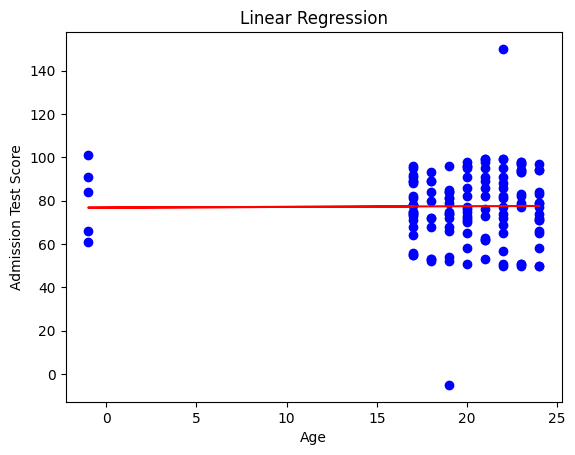

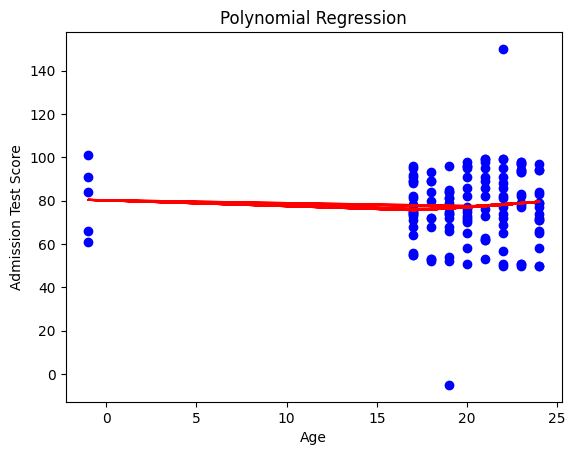

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-1-aa6efbf37baa>:69: RuntimeWarning: overflow encountered in square
  return np.sum((X.dot(theta) - y) ** 2) / (2 * m)
<ipython-input-1-aa6efbf37baa>:76: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * (X.T.dot(X.dot(theta) - y)) / m


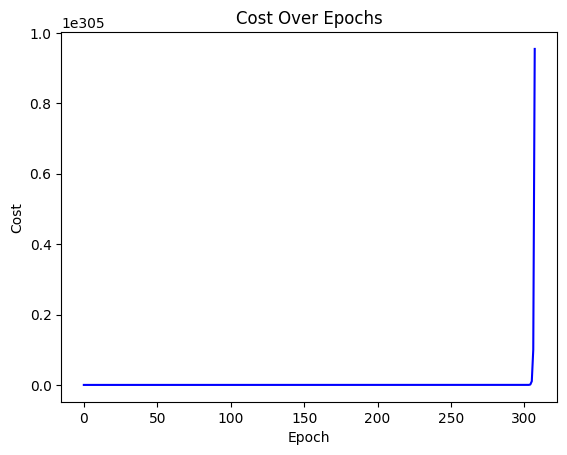

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load the data from an Excel file
file_path = '/content/student_admission_record_dirty.xlsx'
data = pd.read_excel(file_path)

# Filter valid numerical data (ignoring any non-numeric or NaN values)
filtered_data = data[['Age', 'Admission Test Score']].dropna()

# Extracting X and y
X = filtered_data[['Age']].values
y = filtered_data['Admission Test Score'].values

# Implementing Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Predictions using Linear Regression
y_pred_lin = lin_reg.predict(X)

# Plotting Linear Regression
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred_lin, color='red')
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Admission Test Score')
plt.show()

# Implementing Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Predictions using Polynomial Regression
y_pred_poly = poly_reg.predict(X_poly)

# Plotting Polynomial Regression
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred_poly, color='red')
plt.title('Polynomial Regression')
plt.xlabel('Age')
plt.ylabel('Admission Test Score')
plt.show()

# Saving the results back to Excel
results = pd.DataFrame({
    'Age': filtered_data['Age'],
    'Actual Admission Test Score': y,
    'Predicted Admission Test Score (Linear)': y_pred_lin,
    'Predicted Admission Test Score (Polynomial)': y_pred_poly
})

with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    results.to_excel(writer, sheet_name='Regression_Results', index=False)

# Gradient Descent for Linear Regression
alpha = 0.01  # Learning rate
epochs = 1000  # Number of iterations
m = len(y)
theta = np.zeros(2)  # Initializing theta

def compute_cost(X, y, theta):
    return np.sum((X.dot(theta) - y) ** 2) / (2 * m)

def gradient_descent(X, y, theta, alpha, epochs):
    X = np.c_[np.ones(m), X]  # Adding bias term
    cost_history = []

    for epoch in range(epochs):
        theta -= alpha * (X.T.dot(X.dot(theta) - y)) / m
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Running gradient descent
theta, cost_history = gradient_descent(X, y, theta, alpha, epochs)

# Plotting the cost over epochs
plt.plot(range(epochs), cost_history, color='blue')
plt.title('Cost Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

# Saving the cost history to Excel
cost_df = pd.DataFrame({
    'Epoch': range(epochs),
    'Cost': cost_history
})

with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    cost_df.to_excel(writer, sheet_name='Cost_History', index=False)
